In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import sklearn
import glob

In [2]:
# Saving all .csv files in folder to list.
path = "CICIDS2017"
files = [file for file in glob.glob(path + "**/*.csv", recursive=True)]

In [3]:
# Reading all the csv files into dataframes and putting thoose DFs to one list.
[print(f) for f in files]
df = [pd.read_csv(f) for f in files]

CICIDS2017/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
CICIDS2017/Monday-WorkingHours.pcap_ISCX.csv
CICIDS2017/Friday-WorkingHours-Morning.pcap_ISCX.csv
CICIDS2017/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
CICIDS2017/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
CICIDS2017/Tuesday-WorkingHours.pcap_ISCX.csv
CICIDS2017/Wednesday-workingHours.pcap_ISCX.csv
CICIDS2017/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv


In [4]:
# Here we can see the number of rows and columns for each table.

for d in df:
    print(d.shape)

(288602, 79)
(529918, 79)
(191033, 79)
(286467, 79)
(225745, 79)
(445909, 79)
(692703, 79)
(170366, 79)


In [5]:
# We already established that all tables have the same number of columns, but are they the same columns?
# This next piece of code loops over all given tables and compares each of them to all others.

for i in range(0,len(df)):
    if i != len(df)-1:
        same_columns = df[i].columns == df[i+1].columns
        if False in same_columns:
            print(i)
            break

same_columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [6]:
# Combining all tables into one dataset. This is possilbe since all tables have the same columns,
# as we checked in the cell above.

df = pd.concat([d for d in df]).drop_duplicates(keep=False)
df.reset_index(drop=True, inplace = True)

In [7]:
# By checking the shape of dataset we can confirm that concatenation has been successfull.

df.shape

(2427193, 79)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2427193 entries, 0 to 2427192
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

In [9]:
# Removing whitespaces in column names.

col_names = [col.replace(' ', '') for col in df.columns]
df.columns = col_names
df.head()

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,60148,83,1,2,0,0,0,0,0.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
1,123,99947,1,1,48,48,48,48,48.0,0.0,...,40,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
2,123,37017,1,1,48,48,48,48,48.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
3,0,111161336,147,0,0,0,0,0,0.0,0.0,...,0,1753752.625,2123197.578,4822992,95,9463032.7,2657727.996,13600000,5700287,BENIGN
4,123,38407,1,1,48,48,48,48,48.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN


In [10]:
df.keys()

Index(['DestinationPort', 'FlowDuration', 'TotalFwdPackets',
       'TotalBackwardPackets', 'TotalLengthofFwdPackets',
       'TotalLengthofBwdPackets', 'FwdPacketLengthMax', 'FwdPacketLengthMin',
       'FwdPacketLengthMean', 'FwdPacketLengthStd', 'BwdPacketLengthMax',
       'BwdPacketLengthMin', 'BwdPacketLengthMean', 'BwdPacketLengthStd',
       'FlowBytes/s', 'FlowPackets/s', 'FlowIATMean', 'FlowIATStd',
       'FlowIATMax', 'FlowIATMin', 'FwdIATTotal', 'FwdIATMean', 'FwdIATStd',
       'FwdIATMax', 'FwdIATMin', 'BwdIATTotal', 'BwdIATMean', 'BwdIATStd',
       'BwdIATMax', 'BwdIATMin', 'FwdPSHFlags', 'BwdPSHFlags', 'FwdURGFlags',
       'BwdURGFlags', 'FwdHeaderLength', 'BwdHeaderLength', 'FwdPackets/s',
       'BwdPackets/s', 'MinPacketLength', 'MaxPacketLength',
       'PacketLengthMean', 'PacketLengthStd', 'PacketLengthVariance',
       'FINFlagCount', 'SYNFlagCount', 'RSTFlagCount', 'PSHFlagCount',
       'ACKFlagCount', 'URGFlagCount', 'CWEFlagCount', 'ECEFlagCount',
       '

In [11]:
# Dataset conatains 15 labels.
print(df['Label'].unique())
len(df['Label'].unique())
# df.head()

['BENIGN' 'Infiltration' 'Bot' 'PortScan' 'DDoS' 'FTP-Patator'
 'SSH-Patator' 'DoS slowloris' 'DoS Slowhttptest' 'DoS Hulk'
 'DoS GoldenEye' 'Heartbleed' 'Web Attack � Brute Force'
 'Web Attack � XSS' 'Web Attack � Sql Injection']


15

In [12]:
# This next snippet uses regular expressions to replace wierd characters with dunders.

label_names = df['Label'].unique()


import re

label_names = [re.sub("[^a-zA-Z ]+", "", l) for l in label_names]
label_names = [re.sub("[\s\s]", '_', l) for l in label_names]
label_names = [lab.replace("__", "_") for lab in label_names]

label_names, len(label_names)

(['BENIGN',
  'Infiltration',
  'Bot',
  'PortScan',
  'DDoS',
  'FTPPatator',
  'SSHPatator',
  'DoS_slowloris',
  'DoS_Slowhttptest',
  'DoS_Hulk',
  'DoS_GoldenEye',
  'Heartbleed',
  'Web_Attack_Brute_Force',
  'Web_Attack_XSS',
  'Web_Attack_Sql_Injection'],
 15)

In [13]:
# Replacing 'Label' column values with new readable values.

labels = df['Label'].unique()

for i in range(0,len(label_names)):
    df['Label'] = df['Label'].replace({labels[i] : label_names[i]})
    
df['Label'].unique()

array(['BENIGN', 'Infiltration', 'Bot', 'PortScan', 'DDoS', 'FTPPatator',
       'SSHPatator', 'DoS_slowloris', 'DoS_Slowhttptest', 'DoS_Hulk',
       'DoS_GoldenEye', 'Heartbleed', 'Web_Attack_Brute_Force',
       'Web_Attack_XSS', 'Web_Attack_Sql_Injection'], dtype=object)

In [14]:
# Dataset conatains 15 labels.
print(df['Label'].unique())
len(df['Label'].unique())

['BENIGN' 'Infiltration' 'Bot' 'PortScan' 'DDoS' 'FTPPatator' 'SSHPatator'
 'DoS_slowloris' 'DoS_Slowhttptest' 'DoS_Hulk' 'DoS_GoldenEye'
 'Heartbleed' 'Web_Attack_Brute_Force' 'Web_Attack_XSS'
 'Web_Attack_Sql_Injection']


15

In [15]:
df.head()

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,60148,83,1,2,0,0,0,0,0.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
1,123,99947,1,1,48,48,48,48,48.0,0.0,...,40,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
2,123,37017,1,1,48,48,48,48,48.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
3,0,111161336,147,0,0,0,0,0,0.0,0.0,...,0,1753752.625,2123197.578,4822992,95,9463032.7,2657727.996,13600000,5700287,BENIGN
4,123,38407,1,1,48,48,48,48,48.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

/Users/emilzacharia/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'BENIGN'),
  Text(1, 0, 'Infiltration'),
  Text(2, 0, 'Bot'),
  Text(3, 0, 'PortScan'),
  Text(4, 0, 'DDoS'),
  Text(5, 0, 'FTPPatator'),
  Text(6, 0, 'SSHPatator'),
  Text(7, 0, 'DoS_slowloris'),
  Text(8, 0, 'DoS_Slowhttptest'),
  Text(9, 0, 'DoS_Hulk'),
  Text(10, 0, 'DoS_GoldenEye'),
  Text(11, 0, 'Heartbleed'),
  Text(12, 0, 'Web_Attack_Brute_Force'),
  Text(13, 0, 'Web_Attack_XSS'),
  Text(14, 0, 'Web_Attack_Sql_Injection')])

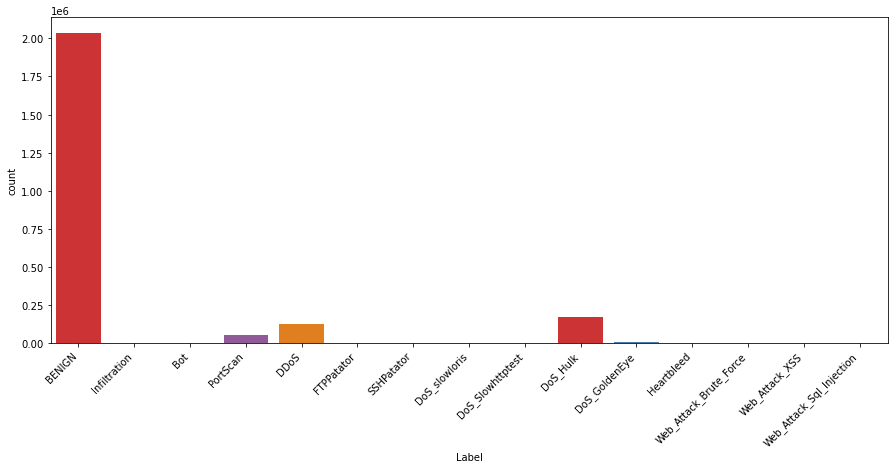

In [17]:
data = df['Label']
plt.figure(figsize=(15,6))
chart = sns.countplot(data, palette="Set1")
plt.xticks(rotation=45, horizontalalignment="right")

/Users/emilzacharia/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Infiltration'),
  Text(1, 0, 'Bot'),
  Text(2, 0, 'PortScan'),
  Text(3, 0, 'DDoS'),
  Text(4, 0, 'FTPPatator'),
  Text(5, 0, 'SSHPatator'),
  Text(6, 0, 'DoS_slowloris'),
  Text(7, 0, 'DoS_Slowhttptest'),
  Text(8, 0, 'DoS_Hulk'),
  Text(9, 0, 'DoS_GoldenEye'),
  Text(10, 0, 'Heartbleed'),
  Text(11, 0, 'Web_Attack_Brute_Force'),
  Text(12, 0, 'Web_Attack_XSS'),
  Text(13, 0, 'Web_Attack_Sql_Injection')])

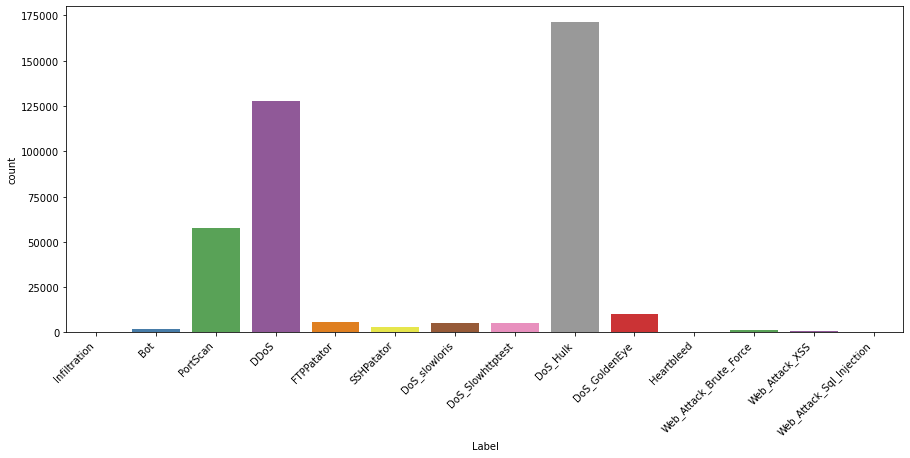

In [18]:
data = df['Label'].where(df['Label'] != "BENIGN")
plt.figure(figsize=(15,6))
chart = sns.countplot(data, palette="Set1")
plt.xticks(rotation=45, horizontalalignment="right")

In [19]:
# Checking if there are any NULL values in the dataset.

df.isnull().values.any()

True

In [20]:
# Checking which column/s contain NULL values.

[col for col in df if df[col].isnull().values.any()]

['FlowBytes/s']

In [21]:
# Checking how many NULL values it this column contains.

df['FlowBytes/s'].isnull().sum()

334

In [22]:
# Considering that only 334 rows contain NULL vlaues in the entire dataset, which makes about 0.01%, we
# can safely remove all NULL rows without spoiling the data.

334/df.shape[0]*100

0.013760751617197316

In [23]:
# Removing rows that contain NULL values and checking if number of removed rows is equal to the number of null values.

before = df.shape

df.dropna(inplace=True)

after = df.shape

before[0] - after[0]

334

In [24]:
df.isnull().any().any()

False

In [25]:
labl = df['Label']
df = df.loc[:, df.columns != 'Label'].astype('float64')

In [26]:
# Checking if all values are finite.

np.all(np.isfinite(df))

False

In [27]:
# Checking what column/s contain non-finite values.

nonfinite = [col for col in df if not np.all(np.isfinite(df[col]))]

nonfinite

['FlowBytes/s', 'FlowPackets/s']

In [28]:
# Checking how many non-finite values each column contains.

finite = np.isfinite(df['FlowBytes/s']).sum()

df.shape[0] - finite

1132

In [29]:
# Same as before, since there is a small number of non-finite values we can safely remove them from the dataset
# without spoiling the dataset.

# Replacing infinite values with NaN values.
df = df.replace([np.inf, -np.inf], np.nan)

In [30]:
# We can see that now we have Nan values again.

np.any(np.isnan(df))

True

In [31]:
# Bringing the Labels back into the dataset before deleting Nan rows.

df = df.merge(labl, how='outer', left_index=True, right_index=True)

In [32]:
# Removing new NaN values.

df.dropna(inplace=True)

In [33]:
df.shape

(2425727, 79)

In [34]:
df.head()

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,60148.0,83.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,32.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,BENIGN
1,123.0,99947.0,1.0,1.0,48.0,48.0,48.0,48.0,48.0,0.0,...,40.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,BENIGN
2,123.0,37017.0,1.0,1.0,48.0,48.0,48.0,48.0,48.0,0.0,...,32.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,BENIGN
3,0.0,111161336.0,147.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1753752.625,2123197.578,4822992.0,95.0,9463032.7,2657727.996,13600000.0,5700287.0,BENIGN
4,123.0,38407.0,1.0,1.0,48.0,48.0,48.0,48.0,48.0,0.0,...,32.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,BENIGN


In [35]:
pd.value_counts(df['Label'])

BENIGN                      2035505
DoS_Hulk                     171509
DDoS                         128005
PortScan                      57305
DoS_GoldenEye                 10279
FTPPatator                     5480
DoS_slowloris                  5289
DoS_Slowhttptest               5176
SSHPatator                     3071
Bot                            1943
Web_Attack_Brute_Force         1445
Web_Attack_XSS                  652
Infiltration                     36
Web_Attack_Sql_Injection         21
Heartbleed                       11
Name: Label, dtype: int64

In [36]:
# Splitting dataset into features and labels.

y = df['Label']
x = df.loc[:, df.columns != 'Label'].astype('float64')

In [37]:
#StandardScaler
from sklearn.preprocessing import MinMaxScaler
x = MinMaxScaler().fit_transform(x)

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
LE = LabelEncoder()

LE.fit(y)
y = LE.transform(y)

In [40]:
# Labels have been replaced with integers.

np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [41]:
# Checking that encoding reversal works.

d = LE.inverse_transform(y)
d = pd.Series(d)
d.unique()

array(['BENIGN', 'Infiltration', 'Bot', 'PortScan', 'DDoS', 'FTPPatator',
       'SSHPatator', 'DoS_slowloris', 'DoS_Slowhttptest', 'DoS_Hulk',
       'DoS_GoldenEye', 'Heartbleed', 'Web_Attack_Brute_Force',
       'Web_Attack_XSS', 'Web_Attack_Sql_Injection'], dtype=object)

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
# The next step is to split training and testing data. For this we will use sklearn function train_test_split().

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1940581, 78), (485146, 78), (1940581,), (485146,))